In [1]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_test_out = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

170498071/170498071 [==============================] - 18s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/25
1563/1563 [==============================] - 26s 8ms/step - loss: 1.8107 - accuracy: 0.3268 - val_loss: 1.5910 - val_accuracy: 0.4371
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3706 - accuracy: 0.4994 - val_loss: 1.1744 - val_accuracy: 0.5776
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1574 - accuracy: 0.5842 - val_loss: 1.0379 - val_accuracy: 0.6333
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0009 - accuracy: 0.6428 - val_loss: 0.9136 - val_accuracy: 0.6849
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8910 - accuracy: 0.6836 - val_loss: 0.8346 - val_accuracy: 0.7102
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8053 - accuracy: 0.7154 - val_loss: 0.8000 - val_accuracy: 0.7239
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7414 - accuracy: 0.7396 - val_loss: 0.7395 - v

Prediction of Image 0


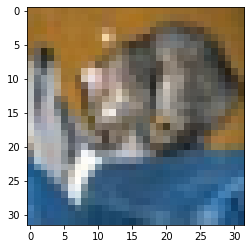

Predicted class:  3
Actual class:  3 

Prediction of Image 1


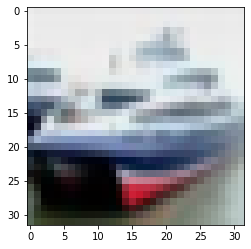

Predicted class:  8
Actual class:  8 

Prediction of Image 2


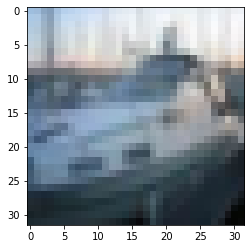

Predicted class:  8
Actual class:  8 

Prediction of Image 3


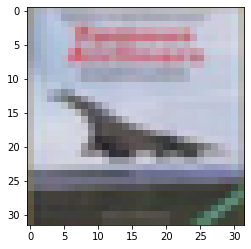

Predicted class:  0
Actual class:  0 



In [4]:
import numpy as np
import matplotlib.pyplot as plt
def predict_test_img(i):
  img = X_test[i]
  img_class = y_test_out[i][0]
  prediction = model.predict(np.array([img]),verbose=0)
 
  print("Prediction of Image",i)
  # Plot the selected image
  plt.imshow(img)
  plt.show()
  print("Predicted class: ", np.argmax(prediction[0]))
  print("Actual class: ", img_class,"\n")

predict_test_img(0)
predict_test_img(1)
predict_test_img(2)
predict_test_img(3)

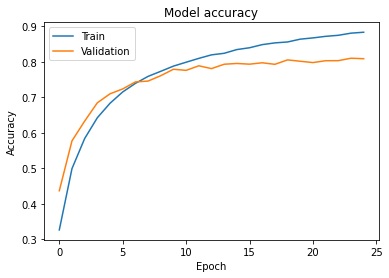

In [8]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

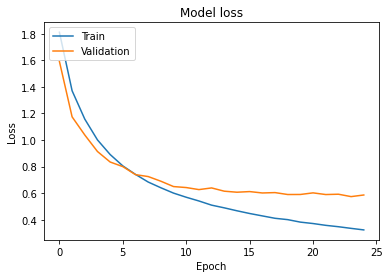

In [9]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()